## Φίλτρο Kalman

#### Περιγραφή

Μοντέλο μετρήσεων: $$\mathbf{v}_k + B_k \hat{\mathbf{x}}_k = \mathbf{b}_k$$ με $k = 0, 1, 2, ...$

Δυναμικό μοντέλο: $$\mathbf{x}_k = T \mathbf{x}_{k-1} + \mathbf{u}$$

όπου

- $\mathbf{x}_k$ το διάνυσμα «κατάστασης» (*state vector*), δηλ. οι παράμετροι που ενδιαφέρουν, τη χρονική στιγμή $t_k$,
- $\mathbf{v}_k$ το διάνυσμα υπολοίπων των μετρήσεων,
- $B_k$ ο πίνακας σχεδιασμού,
- $\mathbf{b}_k$ το διάνυσμα των σταθερών όρων των μετρήσεων,
- $T$ ο πίνακας «μετάβασης» (*transition matrix*), και
- $\mathbf{u}$ το διάνυσμα υπολοίπων του δυναμικού μοντέλου·
  $\mathbf{u} = H \mathbf{w}$, όπου $\mathbf{w}$ είναι το διάνυσμα του «θορύβου» του δυναμικού μοντέλου και $H$ είναι πίνακας συντελεστών.

Οι πίνακες μεταβλητότητας συμμεταβλητότητας $Q_{x_k}$, $Q_v$ και $Q_u \left(= H Q_w H^T \right)$ εκφράζουν τις αβεβαιότητες του διανύσματος κατάστασης, των μετρήσεων και του δυναμικού μοντέλου αντίστοιχα.

#### Διαδικασία υπολογισμού

Αρχική κατάσταση $\mathbf{x}_{k-1}$ και πίνακας μεταβλητότητας -- συμμεταβλητότητας $Q_{x_{k-1}}$

1. Πρόβλεψη: $$\mathbf{x}^{\prime}_k = T \mathbf{x}_{k-1}$$ και $$Q^{\prime}_{x_k} = T Q_{x_{k-1}} T^T + Q_u$$
1. Πίνακας «κέρδους» (gain matrix): $$K_k = Q^{\prime}_{x_k} B^T_k \left(Q_v + B_k Q^{\prime}_{x_k} B^T_k \right)^{-1}$$
1. Ενημέρωση: $$\hat{\mathbf{x}}_k = \mathbf{x}^{\prime}_k + K_k \left( \mathbf{b}_k - B_k \mathbf{x}^{\prime}_k \right)$$ και 
   $$Q_{x_k} = \left( I - K_k B_k \right) Q^{\prime}_{x_k}$$

#### Παράδειγμα

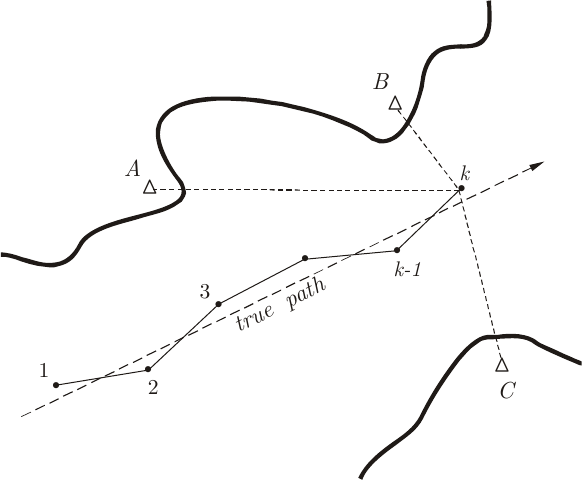

Ένα πλοίο κινείται με σταθερή ταχύτητα (κατά μέτρο και διεύθυνση).  Ανά τακτά χρονικά διαστήματα (πχ. 60s) γίνονται μετρήσεις αποστάσεων προς ραδιοφάρους γνωστής θέσης που βρίσκονται στην περιοχή (A, B, C).  Από τις μετρήσεις προσδιορίζεται η θέση του σκάφους τη στιγμή των μετρήσεων.  Οι διαδοχικές θέσεις των μετρήσεων απεικονίζονται με τη συνεχή γραμμή στο παραπάνω σχήμα, ενώ η «αληθής» πορεία του πλοίου εμφανίζεται ως διακεκομμένη.

###### Διάνυσμα κατάστασης

Το διάνυσμα κατάστασης για το παραπάνω πρόβλημα θα περιλαμβάνει τη θέση και την ταχύτητα του σκάφους, δηλ.
$$\mathbf{x}_k = \left[ x_k, y_k, \dot{x}_k, \dot{y}_k \right]^T$$

###### Μοντέλο μετρήσεων (πρωτεύον μοντέλο)

Το μοντέλο των μετρήσεων θα δίνεται από την σχέση
$$\mathbf{l}_k + \mathbf{v}_k = \hat{\mathbf{l}}_k$$
όπου
- $\mathbf{l}_k$ είναι το διάνυσμα των μετρήσεων
- $\mathbf{v}_k$ είναι το διάνυσμα των υπολοίπων των μετρήσεων, και
- $\hat{\mathbf{l}}_k$ είναι οι εκτιμήσεις για τις καλύτερες τιμές των μετρημένων μεγεθών

Οι καλύτερες τιμές των μετρημένων μεγεθών ($\hat{\mathbf{l}}_k$) συνδέονται με μη γραμμικές σχέσεις με τις θέσεις του σκάφους ($\hat{x}_k$, $\hat{y}_k$) και των ραδιοφάρων ($x_j$, $y_j$), για $j = A, B, C$, τη χρονική στιγμή $t_k$
$$\hat{l}_j = \sqrt{\left( \hat{x}_k - x_j \right)^2 + \left( \hat{y}_k - y_j \right)^2}$$

Γραμμικοποιώντας την παραπάνω σχέση (ο εκθέτης ${}^\prime$ δηλώνει προσεγγιστικές τιμές) και αντικαθιστώντας στην εξίσωση του μοντέλου, προκύπτει
$$v_j - l^\prime_k - \frac{x^\prime_k - x_j}{l^\prime_k} \left( \hat{x}_k - x^\prime_k \right) 
- \frac{y^\prime_k - y_j}{l^\prime_k} \left( \hat{y}_k - y^\prime_k \right) = -l_j$$
ή
$$v_j - \frac{x^\prime_k - x_j}{l^\prime_k} \hat{x}_k - \frac{y^\prime_k - y_j}{l^\prime_k} \hat{y}_k = 
l^\prime_k - l_j + \left( -\frac{x^\prime_k - x_j}{l^\prime_k} x^\prime_k - \frac{y^\prime_k - y_j}{l^\prime_k} y^\prime_k \right)$$

Σε διανυσματική μορφή η παραπάνω σχέση θα είναι
$$\mathbf{v}_k + B_k \hat{\mathbf{x}}_k = \mathbf{l}^\prime_k - \mathbf{l}_k + B_k \mathbf{x}^\prime_k \left( = \mathbf{b}_k \right)$$
όπου η κάθε γραμή του *πίνακα σχεδιασμού* ($B_k$) θα είναι της μορφής
$$\begin{bmatrix}-\frac{x^\prime_k - x_j}{l^\prime_k} & -\frac{y^\prime_k - y_j}{l^\prime_k} & 0 & 0\end{bmatrix}$$

Συνδιάζοντας την σχέση αυτή με την εξίσωση για την ενημέρωση του διανύσματος κατάστασης (δες βήμα 3 της διαδικασίας υπολογισμού) έχουμε
$$\hat{\mathbf{x}}_k 
= \mathbf{x}^{\prime}_k + K_k \left( \mathbf{l}^\prime_k - \mathbf{l}_k + B_k \mathbf{x}^\prime_k - B_k \mathbf{x}^{\prime}_k \right)$$
ή
$$\hat{\mathbf{x}}_k = \mathbf{x}^{\prime}_k + K_k \left( \mathbf{l}^\prime_k - \mathbf{l}_k \right)$$

###### Δυναμικό (δευτερεύων) μοντέλο

Για την ανάπτυξη του δυναμικού μοντέλου θεωρούμε ότι η κίνηση του σκάφους διέπεται από τις αρχές της **ευθύγραμμης ομαλής κίνησης**, που περιγράφεται από τη συνάρτηση
$$z\left(t\right) = z\left(t_k\right) + \left(t - t_k\right) \dot{z}\left(t_k\right)$$

Ο θόρυβος του δυναμικού μοντέλου (το διάνυσμα $\mathbf{w}$) μπορεί να θεωρηθεί ότι προέρχεται από **επιταχύνσεις** που δεν έχουν μοντελοποιηθεί (δηλαδή δεν συμπεριλαμβάνονται στο διάνυσμα κατάστασης).  Έτσι, η κίνηση του σκάφους περιγράφεται από τη συνάρτηση
$$z\left(t\right) = z\left(t_k\right) + \left(t - t_k\right) \dot{z}\left(t_k\right) + \frac{\left(t - t_k\right)^2}{2} \ddot{z}\left(t_k\right)$$
και ακολουθεί τις αρχές της **ευθύγραμμης ομαλά επιταχυνόμενης κίνησης**, και η εξίσωση της ταχύτητας θα δίνεται από τη σχέση
$$\dot{z}\left(t\right) = \dot{z}\left(t_k\right) + \left(t - t_k\right) \ddot{z}\left(t_k\right)$$

Σε διανυσματική μορφή θα έχουμε
$$\begin{bmatrix} z \\ \dot{z} \end{bmatrix}_k = \begin{bmatrix} 1 & δt \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix} z \\ \dot{z} \end{bmatrix}_{k-1} + \begin{bmatrix} \frac{{δt}^2}{2} \\ δt \end{bmatrix} 
\begin{bmatrix} \ddot{z} \end{bmatrix}_{k-1}$$

Με επέκταση των παραπάνω σε δύο διαστάσεις, προκύπτει το δυναμικό μοντέλο
$$\begin{bmatrix} x \\ y \\ \dot{x} \\ \dot{y} \end{bmatrix}_k = 
\begin{bmatrix} 1 & 0 & δt & 0 \\ 0 & 1 & 0 & δt \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} 
\begin{bmatrix} x \\ y \\ \dot{x} \\ \dot{y} \end{bmatrix}_{k-1} + 
\begin{bmatrix} \frac{{δt}^2}{2} & 0 \\ 0 & \frac{{δt}^2}{2} \\ δt & 0 \\ 0 & δt \end{bmatrix} 
\begin{bmatrix} \ddot{x} \\ \ddot{y} \end{bmatrix}_{k-1}$$
με 
$T = \begin{bmatrix} 1 & 0 & δt & 0 \\ 0 & 1 & 0 & δt \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$,
$H = \begin{bmatrix} \frac{{δt}^2}{2} & 0 \\ 0 & \frac{{δt}^2}{2} \\ δt & 0 \\ 0 & δt \end{bmatrix}$ και
$\mathbf{w} = \begin{bmatrix} \ddot{x} \\ \ddot{y} \end{bmatrix}$.

###### Αριθμητικά δεδομένα

- Οι αρχικές συνθήκες για το διάνυσμα κατάστασης είναι 
$\mathbf{x}_0 = \left[ 7875.0\text{m}, 6319.392\text{m}, 7\frac{\text{m}}{\text{s}}, 3\frac{\text{m}}{\text{s}} \right]^T$
- Οι αρχικές μεταβλητότητες του διανύσματος κατάστασης είναι 20$\text{m}^2$ για τις θέσεις και 0.5$\frac{\text{m}^2}{\text{s}^2}$ για τις ταχύτητες
- Ο θόρυβος του μοντέλου ακολουθεί την κανονική κατανομή με μέση τιμή 0$\frac{\text{m}}{\text{s}^2}$ και μεταβλητότητα 0.017$\frac{\text{m}^2}{\text{s}^4}$
- Οι θέσεις των ραδιοφάρων είναι γνωστές και οι συντεταγμένες τους είναι:

| σημείο | x [m] | y [m] |
|:---:|---:|---:|
| A | 10000.0 | 10000.0 |
| B | 13880.0 | 11250.0 |
| C | 15550.0 |  7160.0 |

- Η δειγματοληψία των μετρήσεων γίνεται κάθε 1 λεπτό ($δt = $ 60s)
- Η ακρίβεια (__τυπική απόκλιση__) των μετρήσεων είναι $±$1m
- Οι μετρήσεις προς τους ραδιοφάρους είναι:

| Epoch | A | B | C |
|:---:|---:|---:|---:|
|  1 | 4249.7 | 7768.6 | 7721.1 |
|  2 | 3876.1 | 7321.4 | 7288.5 |
|  3 | 3518.4 | 6872.2 | 6857.6 |
|  4 | 3193.3 | 6426.0 | 6429.1 |
|  5 | 2903.6 | 5982.6 | 6009.7 |
|  6 | 2664.0 | 5543.2 | 5596.6 |
|  7 | 2490.9 | 5107.7 | 5191.5 |
|  8 | 2392.9 | 4678.9 | 4797.1 |
|  9 | 2383.2 | 4253.4 | 4417.8 |
| 10 | 2463.0 | 3841.7 | 4050.9 |
| 11 | 2623.2 | 3435.6 | 3709.9 |
| 12 | 2849.0 | 3054.2 | 3395.8 |
| 13 | 3126.7 | 2692.9 | 3119.4 |
| 14 | 3446.9 | 2366.6 | 2891.1 |
| 15 | 3793.4 | 2096.4 | 2724.4 |
| 16 | 4166.0 | 1900.6 | 2630.9 |
| 17 | 4552.2 | 1804.7 | 2610.2 |
| 18 | 4956.2 | 1824.8 | 2677.4 |
| 19 | 5366.4 | 1959.6 | 2819.7 |
| 20 | 5785.0 | 2182.8 | 3023.5 |

###### Υλοποίηση

In [1]:
dt = 60.;                % περίοδος μετρήσεων
var_state = [20. .5];    % αρχική μεταβλητότητα κατάστασης (θέση, ταχύτητα)
var_v = 1.;              % μεταβλητότητα μετρήσεων
var_w = .017;            % μεταβλητότητα θορύβου (επιταχύνσεων)

Θέσεις ραδιοφάρων

In [2]:
x_beacon = [10000. 13880. 15550.];
y_beacon = [10000. 11250. 7160.];

Μετρήσεις

In [3]:
measurements = [4249.7 7768.6 7721.1
                3876.1 7321.4 7288.5
                3518.4 6872.2 6857.6
                3193.3 6426.0 6429.1
                2903.6 5982.6 6009.7
                2664.0 5543.2 5596.6
                2490.9 5107.7 5191.5
                2392.9 4678.9 4797.1
                2383.2 4253.4 4417.8
                2463.0 3841.7 4050.9
                2623.2 3435.6 3709.9
                2849.0 3054.2 3395.8
                3126.7 2692.9 3119.4
                3446.9 2366.6 2891.1
                3793.4 2096.4 2724.4
                4166.0 1900.6 2630.9
                4552.2 1804.7 2610.2
                4956.2 1824.8 2677.4
                5366.4 1959.6 2819.7
                5785.0 2182.8 3023.5];
epochs = size(measurements)(1)

epochs =  20


Διαστάσεις πινάκων

In [4]:
m = 4;    % συνιστώσες διανύσματος κατάστασης
n = 3;    % μετρήσεις σε κάθε εποχή

Αρχικοποίηση δυναμικού μοντέλου

In [5]:
states = zeros(m, epochs);                    % "διάνυσμα" κατάστασης· η i-στήλη του πίνακα περιέχει το διάνυσμα κατάστασης της i-εποχής
states(:, 1) = [7875., 6319.392, 7., 3.]';
% state_corrections = zeros(m, epochs);
Qxx = diag(repelem(var_state, 2))            % πίνακας μεταβλητότητας - συμμεταβλητότητας του διανύσματος κατάστασης
T = eye(m);                                   % πίνακας μετάβασης
T(1, 3) = dt;
T(2, 4) = dt
H = zeros(m, 2);                              % πίνακας συντελεστών του θορύβου
H(1, 1) = dt^2 / 2.;
H(2, 2) = H(1, 1);
H(3, 1) = dt;
H(4, 2) = H(3, 1)
Qww = var_w * eye(2)                         % πίνακας μεταβλητότητας - συμμεταβλητότητας του θορύβου
Quu = H * Qww * H'                           % πίνακας μεταβλητότητας - συμμεταβλητότητας του δυναμικού μοντέλου

Qxx =

Diagonal Matrix

   20.00000          0          0          0
          0   20.00000          0          0
          0          0    0.50000          0
          0          0          0    0.50000

T =

    1    0   60    0
    0    1    0   60
    0    0    1    0
    0    0    0    1

H =

   1800      0
      0   1800
     60      0
      0     60

Qww =

Diagonal Matrix

   0.017000          0
          0   0.017000

Quu =

   55080.00000       0.00000    1836.00000       0.00000
       0.00000   55080.00000       0.00000    1836.00000
    1836.00000       0.00000      61.20000       0.00000
       0.00000    1836.00000       0.00000      61.20000



Φίλτρο Kalman

In [6]:
Qvv = var_v * eye(n);                                         % πίνακας μεταβλητότητας - συμμεταβλητότητας των μετρήσεων
K = zeros(m, n);                                              % πίνακας κέρδους
for k = 2:epochs                                              % για κάθε εποχή
    states(:, k) = T * states(:, k-1);                        % ********************* πρόβλεψη
    Qxx = T * Qxx * T' + Quu;
    B = zeros(n, m);                                          % πίνακας σχεδιασμού
    b = zeros(n, 1);                                          % διάνυσμα σταθερών όρων
    for j = 1:n                                               % για κάθε μέτρηση
        dx = states(1, k) - x_beacon(j);
        dy = states(2, k) - y_beacon(j);
        s = sqrt(dx * dx + dy * dy);
        B(j, 1) = -dx / s;
        B(j, 2) = -dy / s;
        b(j, 1) = s - measurements(k, j);
    endfor
    K = Qxx * B' / (Qvv + B * Qxx * B');                      % ********************* πίνακας κέρδους
    % state_corrections(:, k) = K * b;
    % states(:, k) = states(:, k) + state_corrections(:, k);
    states(:, k) = states(:, k) + K * b;                      % ********************* ενημέρωση
    Qxx = (eye(m) - K * B) * Qxx;
    % output
    fprintf('\nepoch: %3d', k);
    % fprintf('\n\t     x\t\tcorrections\t\tQxx');
    fprintf('\n\t     x\t\t\t\tQxx');
    for i=1:m
        % fprintf('\n\t%9.3f\t%10.3f\t\t', states(i, k), state_corrections(i, k));
        fprintf('\n\t%9.3f\t\t\t', states(i, k));
        for j = 1:m
            fprintf('%10.6f', Qxx(i,j));
        endfor
    endfor
endfor


epoch:   2
	     x				Qxx
	 8289.594			  1.009225 -0.797965  0.033097 -0.026169
	 6521.882			 -0.797965  1.439797 -0.026169  0.047217
	    6.823			  0.033097 -0.026169  0.506780 -0.000858
	    3.738			 -0.026169  0.047217 -0.000858  0.507243
epoch:   3
	     x				Qxx
	 8705.780			  0.926924 -0.643621  0.030398 -0.021105
	 6727.944			 -0.643621  1.218371 -0.021105  0.039955
	    7.046			  0.030398 -0.021105  0.494715 -0.004015
	    3.141			 -0.021105  0.039955 -0.004015  0.496822
epoch:   4
	     x				Qxx
	 9124.759			  0.863463 -0.498398  0.028327 -0.016346
	 6928.604			 -0.498398  1.011477 -0.016346  0.033180
	    6.922			  0.028327 -0.016346  0.483077 -0.006336
	    3.541			 -0.016346  0.033180 -0.006336  0.486133
epoch:   5
	     x				Qxx
	 9540.095			  0.798512 -0.363666  0.026205 -0.011929
	 7132.756			 -0.363666  0.856483 -0.011929  0.028105
	    6.923			  0.026205 -0.011929  0.471881 -0.007919
	    3.268			 -0.011929  0.028105 -0.007919  0.475282
epoch:   6
	     x				Qxx
	 995

Απόσταση, ταχύτητα, κλπ.

In [7]:
% data = zeros(epochs, 7);
data = zeros(epochs, 3);
% data(:, 4:7) = state_corrections(:, :)';
data(1, 3) = atan2(states(3, 1), states(4, 1)) * 180. / pi;
if data(1, 3) < 0.
    data(1, 3) = data(1, 3) + 360.;
endif
data(1, 2) = sqrt(states(3, 1)^2 + states(4, 1)^2);
for k = 2:epochs
    dx = states(1, k) - states(1, k-1);
    dy = states(2, k) - states(2, k-1);
    data(k, 1) = data(k-1, 1) + sqrt(dx^2 + dy^2);
    data(k, 2) = sqrt(states(3, k)^2 + states(4, k)^2);
    heading = atan2(states(3, k), states(4, k)) * 180. / pi;
    if heading < 0.
        heading = heading + 360.;
    endif
    data(k, 3) = heading;
endfor
fprintf('\n\nfiltered values');
fprintf('\nepoch  distance  velocity  heading');
for k = 1:epochs
    fprintf('\n%3d %11.3f %8.3f %8.3f', k, data(k, 1:3));
endfor



filtered values
epoch  distance  velocity  heading
  1       0.000    7.616   66.801
  2     461.400    7.779   61.286
  3     925.806    7.715   65.975
  4    1390.357    7.775   62.905
  5    1853.155    7.656   64.729
  6    2315.773    7.765   63.208
  7    2778.387    7.660   65.206
  8    3240.322    7.741   62.817
  9    3703.373    7.698   64.889
 10    4165.683    7.713   63.805
 11    4631.259    7.805   63.717
 12    5091.795    7.550   64.711
 13    5555.396    7.900   63.076
 14    6020.782    7.618   64.761
 15    6481.164    7.728   63.223
 16    6945.300    7.744   64.584
 17    7405.657    7.603   63.888
 18    7872.215    7.945   63.889
 19    8335.291    7.497   64.090
 20    8796.471    7.872   64.039

Διαγράμματα

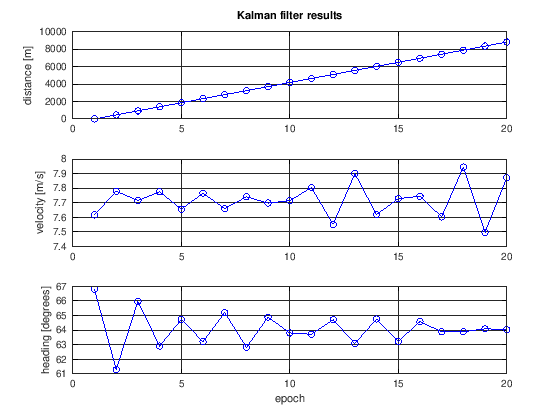

In [8]:
subplot(3, 1, 1);
plot(1:epochs, data(:, 1), 'bo-');
grid on;
title('Kalman filter results');
ylabel('distance [m]');
subplot(3, 1, 2);
plot(1:epochs, data(:, 2), 'bo-');
grid on;
ylabel('velocity [m/s]');
subplot(3, 1, 3);
plot(1:epochs, data(:, 3), 'bo-');
grid on;
xlabel('epoch')
ylabel('heading [degrees]');

#### Αναφορές

Deakin, R.E., *"The Kalman filter and syrveying applications"*, School of Mathematical and Geospatial Sciences, RMIT University, June 2006